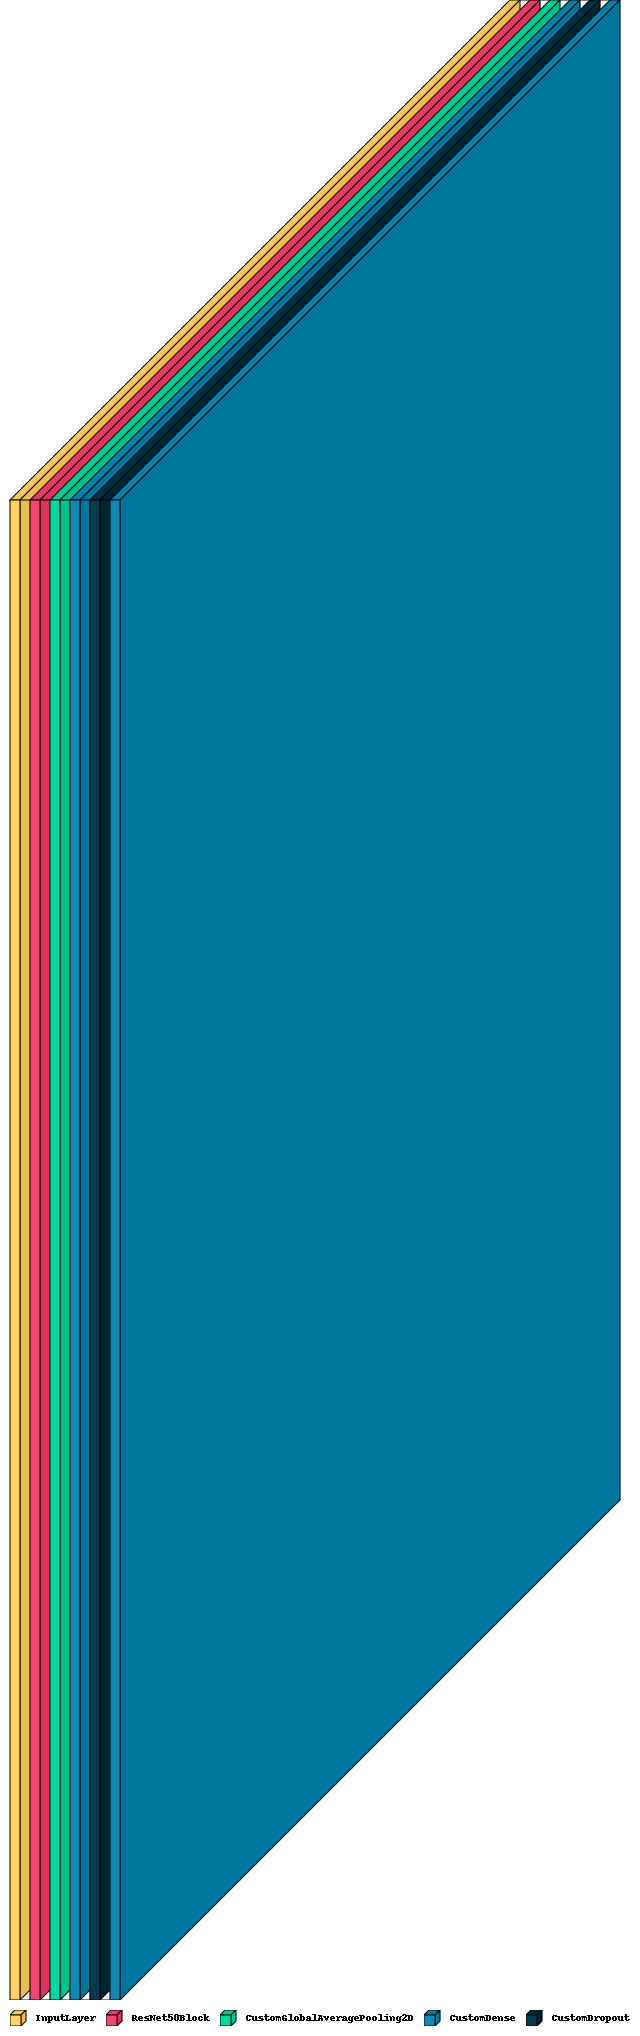

In [4]:
import visualkeras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Dense, GlobalAveragePooling2D, Dropout

# Dummy layer to represent the ResNet50 base model
class ResNet50Block(Layer):
    def __init__(self, **kwargs):
        super(ResNet50Block, self).__init__(**kwargs)
        self.trainable = False  # This layer doesn't have trainable parameters

# Assuming the rest of your model follows a similar structure
class CustomDense(Layer):  # Simulating a Dense layer
    def __init__(self, units, activation, **kwargs):
        super(CustomDense, self).__init__(**kwargs)
        self.units = units
        self.activation = activation

class CustomDropout(Layer):  # Simulating a Dropout layer
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

class CustomGlobalAveragePooling2D(Layer):  # Simulating a GlobalAveragePooling2D layer
    def __init__(self, **kwargs):
        super(CustomGlobalAveragePooling2D, self).__init__(**kwargs)

# Create a simplified model for visualization
input_layer = Input(shape=(150, 150, 3), name='Input')
resnet_block = ResNet50Block(name='ResNet50Base')(input_layer)

# Simulate the last 30 layers of ResNet50 and custom layers for visualization
x = CustomGlobalAveragePooling2D(name='GlobalAvgPool')(resnet_block)
x = CustomDense(512, activation='relu', name='Dense1')(x)
x = CustomDropout(0.3, name='Dropout')(x)
predictions = CustomDense(10, activation='softmax', name='Output')(x)  # Adjust the number of classes as needed

simplified_model = Model(inputs=input_layer, outputs=predictions)

# Generate visualization with visualkeras
visualkeras.layered_view(simplified_model, to_file='simplified_model_visualization.png', legend=True, scale_xy=10, scale_z=1, max_z=10)

